Importuri necesare


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

Multimea de antrenare cu etichetele asociate

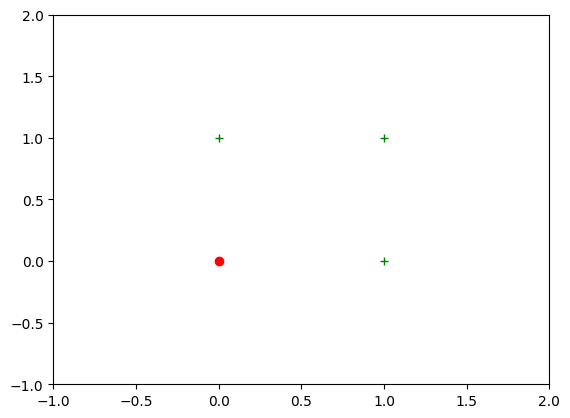

In [4]:
points = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
labels = np.array([-1, 1, 1, 1])
plt.ylim((-1, 2))    
plt.xlim((-1, 2))  
plt.plot(points[labels == -1, 0], points[labels == -1, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g+')
plt.show()


Plotarea dreptei de decizie

In [5]:
def compute_y(x, W, bias): 
    # dreapta de decizie
    # [x, y] * [W[0], W[1]] + b = 0
    return (-x * W[0,0] - bias) / (W[0,1] + 1e-10)

def plot_decision_boundary(X, y , W, b, current_x, current_y): 
    x1 = -1 
    y1 = compute_y(x1, W, b) 
    x2 = 2 
    y2 = compute_y(x2, W, b)
    # sterge continutul ferestrei
    plt.clf()
    # ploteaza multimea de antrenare
    color = 'g'
    if(current_y == -1):
        color = 'r'
    plt.ylim((-1, 2))    
    plt.xlim((-1, 2))  
    plt.plot(X[y == -1, 0], X[y == -1, 1], 'ro')
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'g+')
    # ploteaza exemplul curent
    print("Exemplul curent este", current_x)
    plt.plot(current_x[0], current_x[1], color+'s')
    # afisarea dreptei de decizie
    plt.plot([x1, x2] ,[y1, y2], 'black')
    plt.show(block=False)
    plt.pause(0.3) 

Algoritmul de invatare al perceptronului - Rosenblatt

In [6]:
X = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])#punctele
y = np.array([-1, 1, 1, 1]) #etichetele
#initializare ponderi W si b
W = np.array([[0.1,0.1]])
b = 0
nrEpoci = 70
rataInvatare = 0.5


Sunt la epoca =  0
Exemplul curent este [0 0]


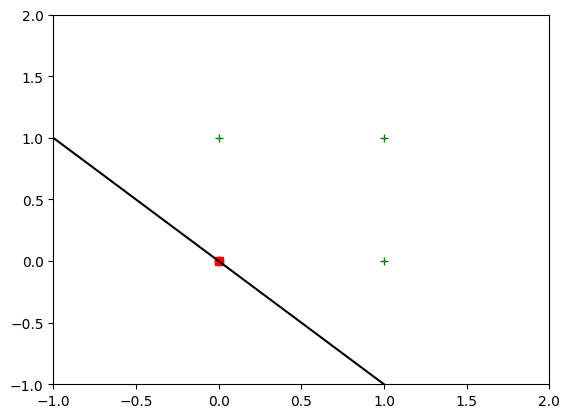

predicted label= 1
loss =  2.0
W =  [[0.1 0.1]] b =  0
Exemplul curent este [0 1]


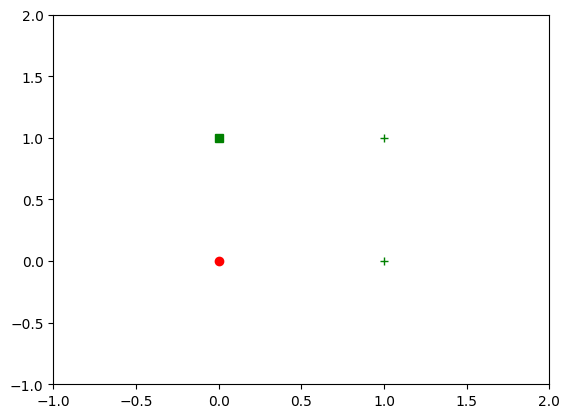

predicted label= -1
loss =  2.0
W =  [[0.1 0.1]] b =  -1.0
Exemplul curent este [1 0]


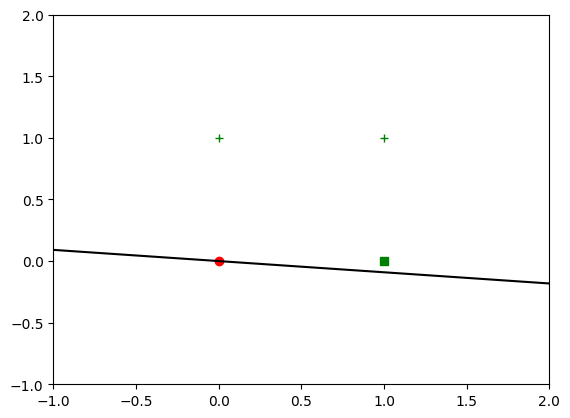

predicted label= 1
loss =  0.0
W =  [[0.1 1.1]] b =  0.0
Exemplul curent este [1 1]


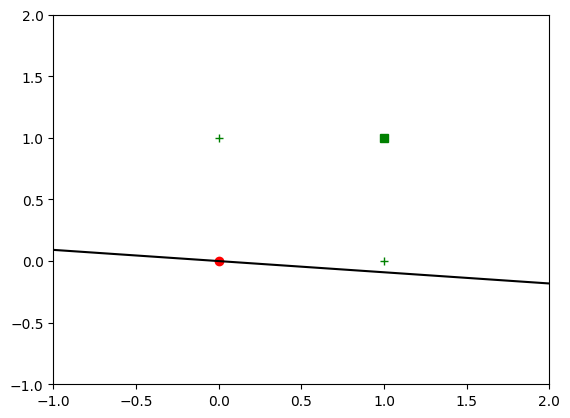

predicted label= 1
loss =  0.0
W =  [[0.1 1.1]] b =  0.0
Sunt la epoca =  1
Exemplul curent este [0 0]


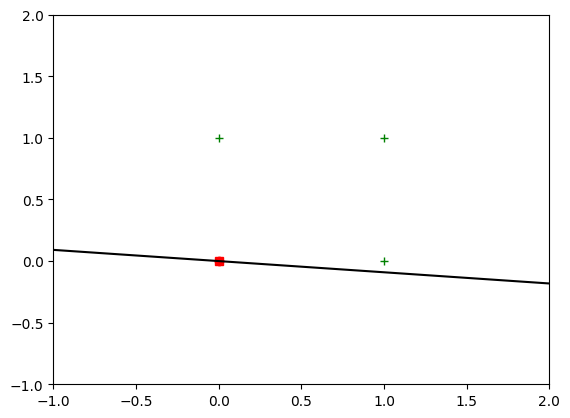

predicted label= 1
loss =  2.0
W =  [[0.1 1.1]] b =  0.0
Exemplul curent este [0 1]


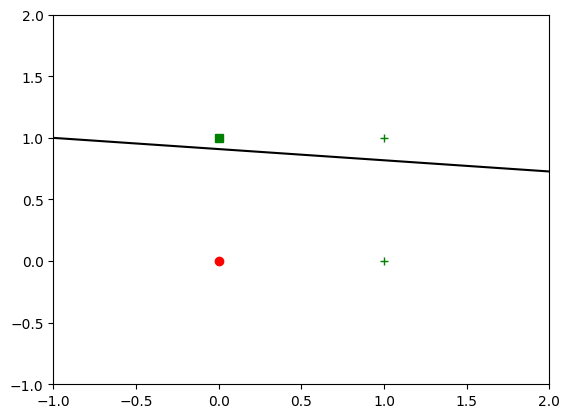

predicted label= 1
loss =  0.0
W =  [[0.1 1.1]] b =  -1.0
Exemplul curent este [1 0]


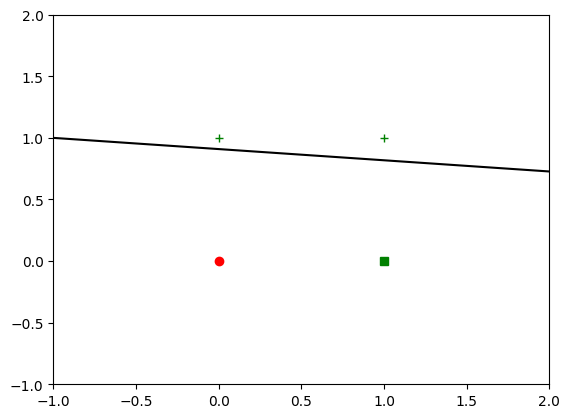

predicted label= -1
loss =  2.0
W =  [[0.1 1.1]] b =  -1.0
Exemplul curent este [1 1]


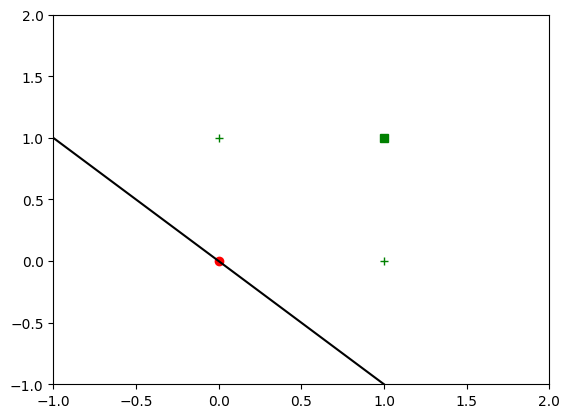

predicted label= 1
loss =  0.0
W =  [[1.1 1.1]] b =  0.0
Sunt la epoca =  2
Exemplul curent este [0 0]


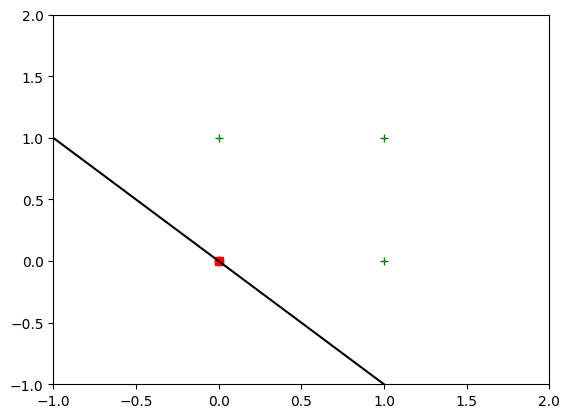

predicted label= 1
loss =  2.0
W =  [[1.1 1.1]] b =  0.0
Exemplul curent este [0 1]


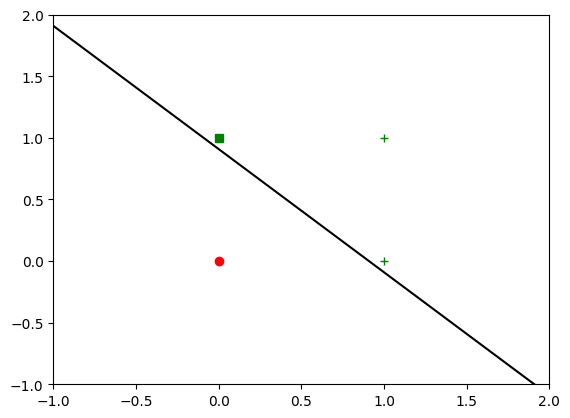

predicted label= 1
loss =  0.0
W =  [[1.1 1.1]] b =  -1.0
Exemplul curent este [1 0]


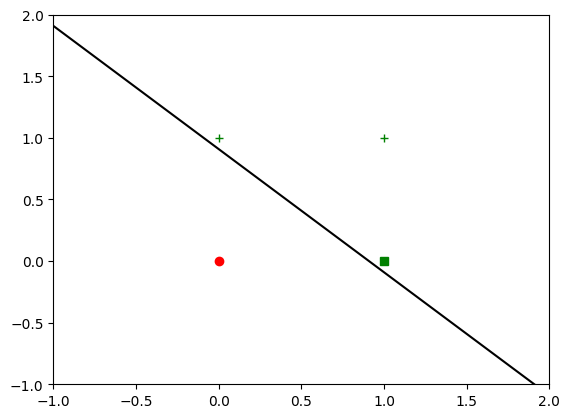

predicted label= 1
loss =  0.0
W =  [[1.1 1.1]] b =  -1.0
Exemplul curent este [1 1]


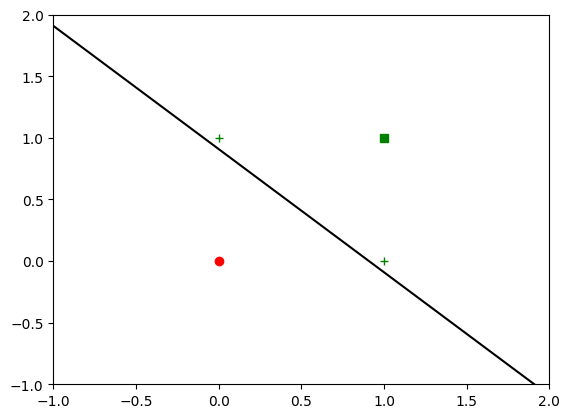

predicted label= 1
loss =  0.0
W =  [[1.1 1.1]] b =  -1.0
Sunt la epoca =  3
Exemplul curent este [0 0]


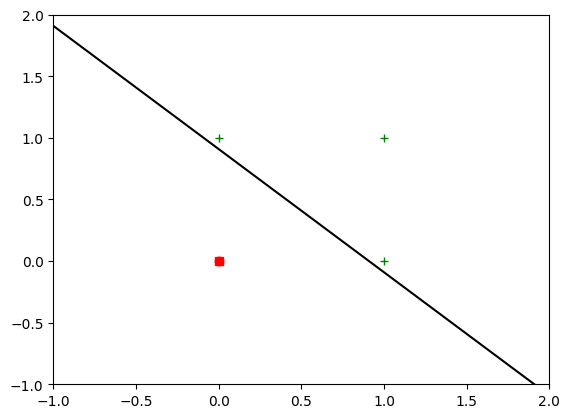

predicted label= -1
loss =  0.0
W =  [[1.1 1.1]] b =  -1.0
Exemplul curent este [0 1]


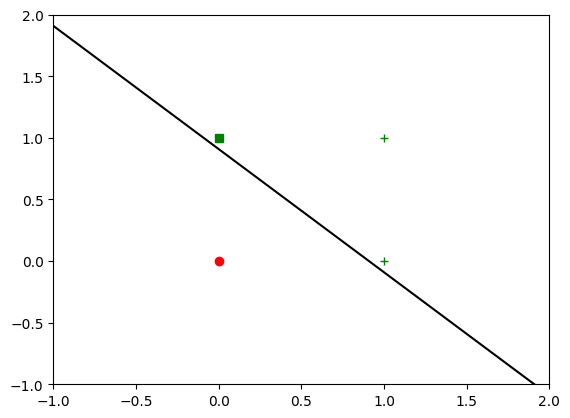

predicted label= 1
loss =  0.0
W =  [[1.1 1.1]] b =  -1.0
Exemplul curent este [1 0]


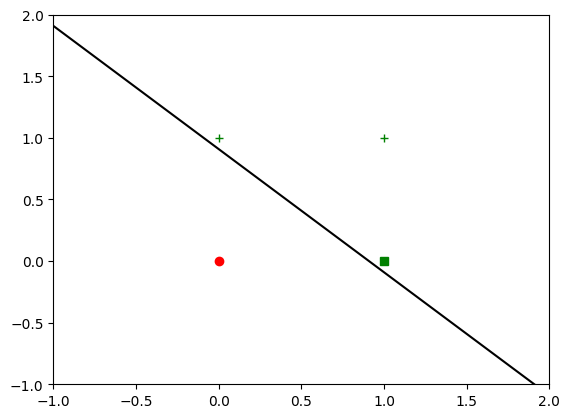

predicted label= 1
loss =  0.0
W =  [[1.1 1.1]] b =  -1.0
Exemplul curent este [1 1]


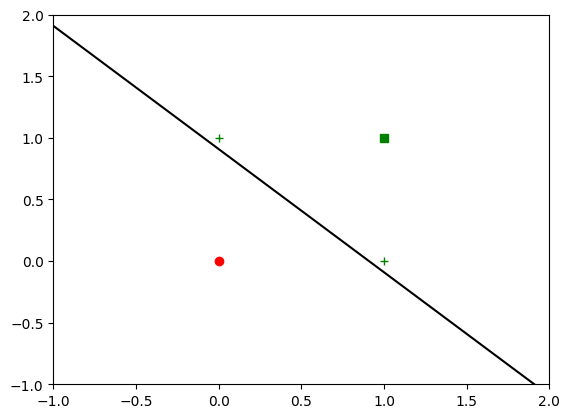

predicted label= 1
loss =  0.0
W =  [[1.1 1.1]] b =  -1.0
W =  [[1.1 1.1]] b= -1.0


In [7]:
for epoca in range(nrEpoci):
    print("Sunt la epoca = ", epoca)
    
    nrExemple = X.shape[0]
    
    fac_update = 0
    
    for t in range(nrExemple):
        plot_decision_boundary(X, y, W, b, X[t,:], y[t])
        
        #calculeaza eticheta prezisa pentru exemplul curent
        if(X[t,0]* W[0,0] + X[t,1]* W[0,1] + b >=0):
            yhat = 1
        else:
            yhat = -1
        print('predicted label=',yhat)
        #calculeaza functia de eroare/pierdere  
        loss = 0.5 * (yhat - y[t])**2
        if (loss > 0):
            fac_update = 1
        
        print("loss = ", loss)
        print("W = ",W, "b = ",b)
        
        #update
        W = W - rataInvatare * (yhat - y[t])*X[t,:]
        b = b - rataInvatare * (yhat - y[t])
    
    if(fac_update == 0):
        break

print("W = ",W, "b=",b)


Varianta Sklearn

In [8]:
P = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=50, shuffle=False, verbose=0, eta0=1.0, n_jobs=1, random_state=0, class_weight=None, warm_start=False)
P.fit(X, y, W, b)
print(P)
print(P.coef_)
print(P.intercept_)

Perceptron(max_iter=50, n_jobs=1, shuffle=False)
[[1.1 1.1]]
[-1.]
